# Setup

In [3]:
if run_init:
    %pip install -U pip
    !if  [ ! -d "deep-learning-project" ] ; then git clone https://github.com/albertsgarde/deep-learning-project.git; fi
    !cd deep-learning-project && git reset --hard && git pull
    !source deep-learning-project/setup.sh deep-learning-project
run_init = False

Note: you may need to restart the kernel to use updated packages.
HEAD is now at 0ff2d2b :poop: Update debug string
Already up to date.
Installing necessary linux packages...
Installed necessary linux packages.
Installing necessary python packages...
Installed necessary python packages.
Installing Rust...
Installed Rust.
Installing maturin...
Installed Maturin.
Building audio_samples_py...
Built audio_samples_py.
Installing audio_samples_py...
Installed audio_samples_py.


In [2]:
run_init = True

In [ ]:
run_init = False

In [4]:
import os

import audio_samples_py as aus

# Real world data

In [ ]:
data_path = "./deep-learning-project/deep-learning/data"

# Load .wav files into Audio objects.
example_long = aus.load_wav(data_path + "/example_cello_long.wav")
example_short = aus.load_wav(data_path + "/example_cello_short.wav")
example_very_short = aus.load_wav(data_path + "/example_cello_very_short.wav")

In [ ]:
print(f"Number of samples: {len(example_long.samples())}")
# Plot the audio.
aus.plot_audio(example_long)
# Create a player for the audio.
aus.play_audio(example_long)

In [ ]:
print(f"Number of samples: {len(example_short.samples())}")
aus.plot_audio(example_short)
aus.play_audio(example_short)

In [ ]:
print(f"Number of samples: {len(example_very_short.samples())}")
aus.plot_audio(example_very_short)
aus.play_audio(example_very_short)

In [ ]:
# A Fourier transform finds the amplitude of each frequency in the signal.
# For audio, relevant frequencies are generally between 20 and 20,000 Hz, as they are the frequencies that humans can hear.
aus.plot_fft(example_very_short)

# Synthesized data

In [31]:
# Create a DataParameters object.
data_parameters = aus.DataParameters(44100, min_frequency=220, max_frequency=440, possible_chord_types=[6])
# The first parameter is the number of samples in each data point.

# Generate a data point based on these parameters.
data_point = data_parameters.generate_at_index(0)

# Print the number of samples in the data_point.
print(len(data_point.samples()))

44100


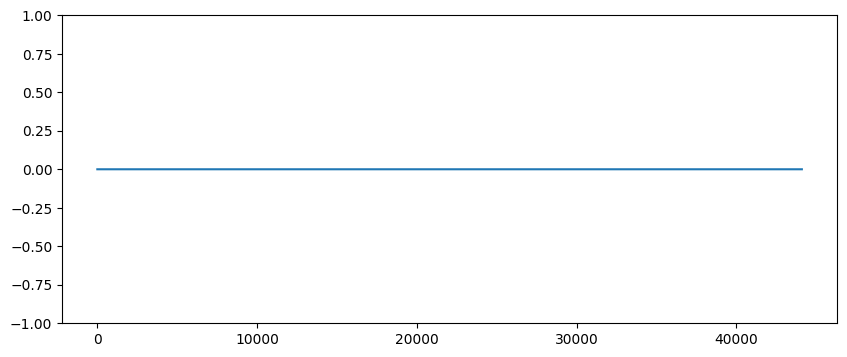

In [12]:
# Great! This is what we asked for.
# Let's see how it looks and sounds!
aus.plot_data_point(data_point)
aus.play_data_point(data_point)

In [32]:
# Oh no! This isn't useful at all!
# What we're missing is an oscillator.
data_parameters = data_parameters.add_sine((0.4, 0.8))
# The above adds a sine oscillator with a random amplitude between 0.4 and 0.8.

44100


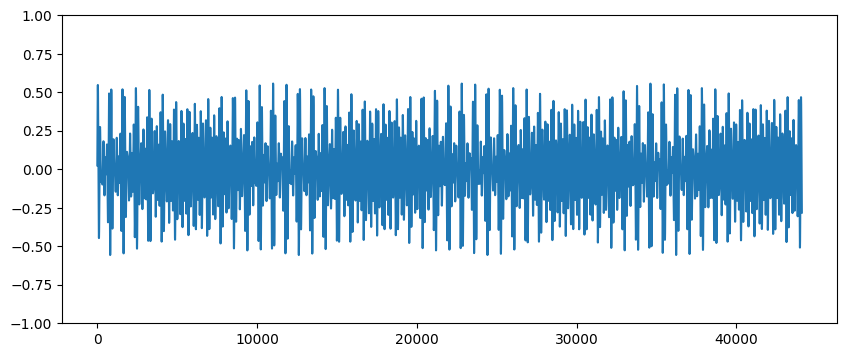

In [33]:
# Generate a data point based on these parameters.
data_point = data_parameters.generate_at_index(0)

# Print the number of samples in the data_point.
print(len(data_point.samples()))

# Let's try to plot and play again.
aus.plot_data_point(data_point)
aus.play_data_point(data_point)

## Waveforms

In [ ]:
# That's better!
# Try running the previous code block again with different index arguments to generate_at_index

# We used a sine oscillator, but there are many others:
index = 1
num_samples = 256
min_frequency = 220
max_frequency = 440

In [ ]:
sine_data_parameters = aus.DataParameters(num_samples, min_frequency=min_frequency, max_frequency=max_frequency).add_sine((0.4, 0.8))
data_point = sine_data_parameters.generate_at_index(index)
print(f"Sine wave: {data_point.frequency()} Hz")
aus.plot_data_point(data_point)
aus.play_data_point(data_point)


saw_data_parameters = aus.DataParameters(num_samples, min_frequency=min_frequency, max_frequency=max_frequency).add_saw((0.4, 0.8))
data_point = saw_data_parameters.generate_at_index(index)
print(f"Saw wave: {data_point.frequency()} Hz")
aus.plot_data_point(data_point)
aus.play_data_point(data_point)


pulse_data_parameters = aus.DataParameters(num_samples, min_frequency=min_frequency, max_frequency=max_frequency).add_pulse((0.4, 0.8), (0.1, 0.9))
data_point = pulse_data_parameters.generate_at_index(index)
print(f"Pulse wave: {data_point.frequency()} Hz")
aus.plot_data_point(data_point)
aus.play_data_point(data_point)


triangle_data_parameters = aus.DataParameters(num_samples, min_frequency=min_frequency, max_frequency=max_frequency).add_triangle((0.4, 0.8))
data_point = triangle_data_parameters.generate_at_index(index)
print(f"Triangle wave: {data_point.frequency()} Hz")
aus.plot_data_point(data_point)
aus.play_data_point(data_point)


noise_parameters = aus.DataParameters(num_samples, min_frequency=min_frequency, max_frequency=max_frequency).add_noise((0.4, 0.8))
data_point = noise_parameters.generate_at_index(index)
print(f"Noise: {data_point.frequency()} Hz")
aus.plot_data_point(data_point)
aus.play_data_point(data_point)

In [ ]:
data_point = sine_data_parameters.generate_at_index(index)
print(f"Sine wave: {data_point.frequency()} Hz")
aus.plot_data_point_fft(data_point)

data_point = saw_data_parameters.generate_at_index(index)
print(f"Saw wave: {data_point.frequency()} Hz")
aus.plot_data_point_fft(data_point)

data_point = pulse_data_parameters.generate_at_index(index)
print(f"Pulse wave: {data_point.frequency()} Hz")
aus.plot_data_point_fft(data_point)

data_point = triangle_data_parameters.generate_at_index(index)
print(f"Triangle wave: {data_point.frequency()} Hz")
aus.plot_data_point_fft(data_point)

data_point = noise_parameters.generate_at_index(index)
print(f"Noise: {data_point.frequency()} Hz")
aus.plot_data_point_fft(data_point)

## Effects

In [ ]:
# Let's try to add effects to make it more difficult for our model.
distorted_data_parameters = sine_data_parameters.apply_distortion((0.9, 0.9))
sine_data_point = sine_data_parameters.generate_at_index(0)
dist_data_point = distorted_data_parameters.generate_at_index(0)
print("Sine wave")
aus.plot_data_point(sine_data_point)
aus.play_data_point(sine_data_point)
print("Distorted sine wave")
aus.plot_data_point(dist_data_point)
aus.play_data_point(dist_data_point)
print("Sine wave fft")
aus.plot_data_point_fft(sine_data_point)
print("Distorted sine wave fft")
aus.plot_data_point_fft(dist_data_point)